<a href="https://colab.research.google.com/github/Patriol-LLC/0625/blob/main/Permutation_Importance_Annotated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaining Deeper Insight From Your Machine Learning Models




**We start by importing the usual dependencies**

In [37]:
#Dependencies
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

**Next we read in the CSV data of exchange rate of the South African Rand Against The United States Dollar**

In [4]:
#Read in the data
csv = pd.read_csv('/content/drive/MyDrive/DATA/FX/USDZAR/USDZAR.csv')

**Let's inspect the data frame**

In [5]:
#Inspect the data
csv.head()

,Date,Open,High,Low,Close,Volume
0,2015.12.02,14.4261,14.4503,14.3050,14.3395,19003
1,2015.12.03,14.3409,14.3900,14.2399,14.3515,21686
2,2015.12.04,14.3489,14.4676,14.2651,14.3528,23588
3,2015.12.07,14.3411,14.5624,14.3259,14.5064,15414
4,2015.12.08,14.4997,14.6949,14.4861,14.5819,22924


In [127]:
df.describe()

,Open,High,Low,Close,Volume,High_Low_Spread
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,15.030998,15.196116,14.891615,15.032627,22222.440000,0.304500
std,0.796574,0.824517,0.779588,0.797100,4918.577498,0.165232
min,13.266000,13.389500,13.192200,13.273300,9539.000000,0.065500
25%,14.422800,14.558875,14.320675,14.430350,19453.750000,0.203900
50%,15.081950,15.263100,14.900300,15.078600,22097.000000,0.266100
75%,15.570725,15.732875,15.487650,15.578800,25186.500000,0.363475
max,16.859900,17.783000,16.706500,16.857500,33887.000000,1.397200


**Let's plot the data**

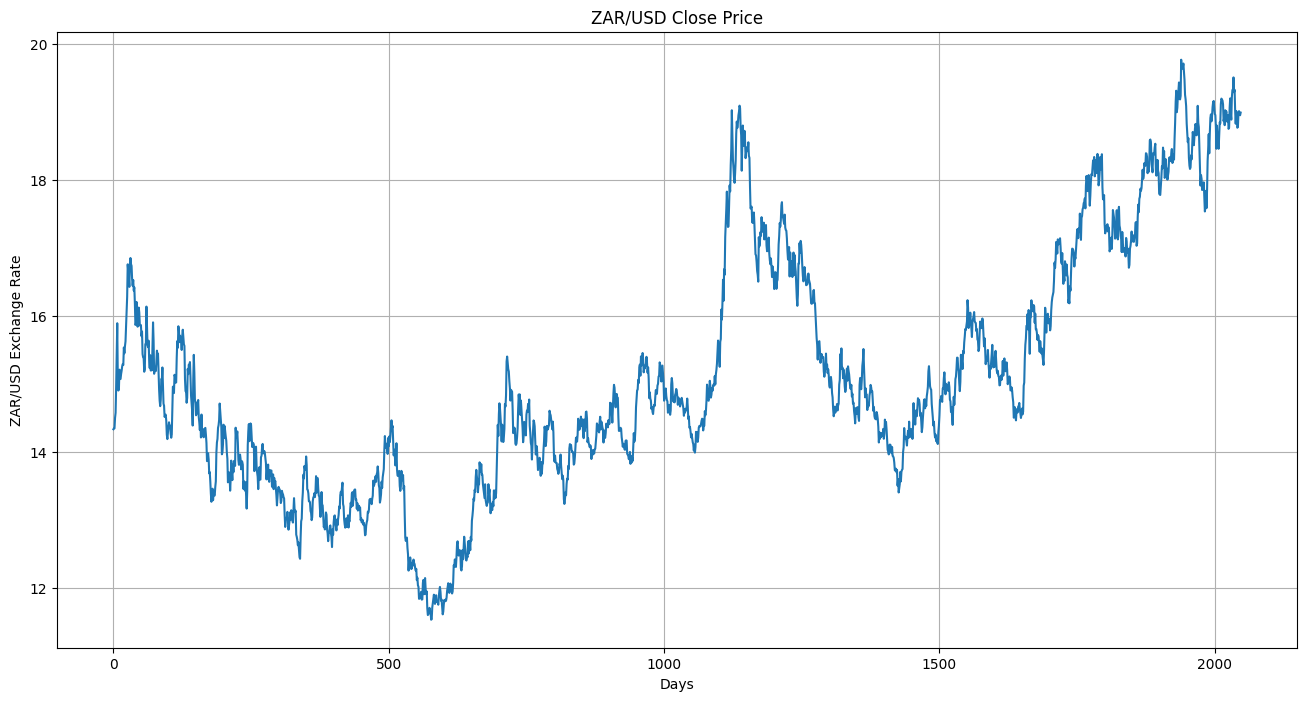

In [129]:
#Plot the data
plt.figure(figsize=(16,8))
plt.plot(csv['Close'])
plt.title('ZAR/USD Close Price')
plt.xlabel('Days')
plt.ylabel('ZAR/USD Exchange Rate')
plt.grid(True)
plt.show()

**How large is the dataset?**

**If it's too large, training will take too long. We'll reduce it for demonstrational purposes and also add in an extra feature measuring the spread between the high and low price.**

In [7]:
#How large is the dataset?
csv.shape

(2048, 6)

In [101]:
#Let's work with a smaller dataframe for this lesson, the first 200 rows for training
df = csv.loc[ 0:199,:]
df.shape

(200, 6)

In [103]:
#Let's engineer our own feature
df['High_Low_Spread'] = df['High'] - df['Low']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Let's see what the new column looks like when plotted against close price, is it indicative of close price?**

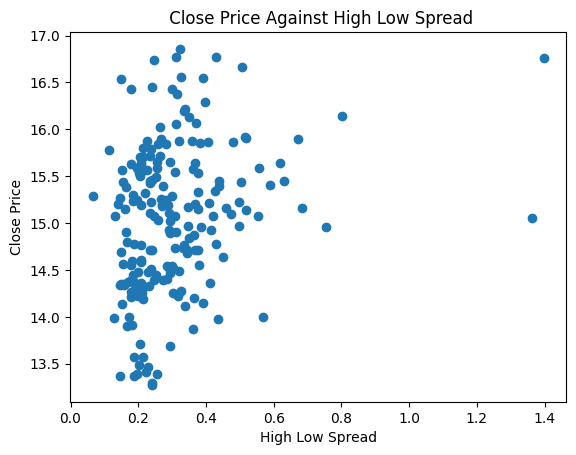

In [106]:
#Let's see how that feature is interacting with the data
plt.title(' Close Price Against High Low Spread')
plt.scatter(df['High_Low_Spread'],df['Close'])
plt.xlabel('High Low Spread')
plt.ylabel('Close Price')
plt.show()

**There appear to be no trend in the newly engineered feature and the target**

**Let's peek at our dataframe in its current form**

In [70]:
df

,Date,Open,High,Low,Close,Volume,High_Low_Spread
0,2015.12.02,14.4261,14.4503,14.3050,14.3395,19003,0.1453
1,2015.12.03,14.3409,14.3900,14.2399,14.3515,21686,0.1501
2,2015.12.04,14.3489,14.4676,14.2651,14.3528,23588,0.2025
3,2015.12.07,14.3411,14.5624,14.3259,14.5064,15414,0.2365
4,2015.12.08,14.4997,14.6949,14.4861,14.5819,22924,0.2088
...,...,...,...,...,...,...,...
195,2016.09.02,14.5889,14.6747,14.3547,14.4866,31421,0.3200
196,2016.09.05,14.4738,14.4966,14.3280,14.3744,18567,0.1686
197,2016.09.06,14.3710,14.3984,13.9615,13.9715,20049,0.4369
198,2016.09.07,13.9721,14.0770,13.9033,13.9961,24986,0.1737


**Splitting our data into training and validation sets**

In [71]:
#Partitioning our dataset into 2/3 for training and 1/3 for validation
#Notice we didn't use the sklearn train test split on time series data! This will be explained further in later lessons
train_size = int( len(df) * (2/3))

#Splitting
train_x, train_y = df.loc[0:train_size,['Open','High','Low','Volume','High_Low_Spread']] , df.loc[0:train_size,'Close']
val_x , val_y = df.loc[train_size:len(df),['Open','High','Low','Volume','High_Low_Spread']] , df.loc[train_size:len(df),'Close']

**Inspecting the shapes of the sets**

In [72]:
train_x.shape

(134, 5)

In [73]:
train_y.shape

(134,)

In [74]:
val_x.shape

(67, 5)

In [75]:
val_y.shape

(67,)

**Fitting the linear and random forest models**

In [76]:
#Fitting the models
random_forest = RandomForestRegressor(n_estimators=10,random_state=0).fit(train_x,train_y)
linear_model = LinearRegression().fit(train_x,train_y)

In [77]:
print("The coeffcients are in this order: ")
print(train_x.columns)
linear_model.coef_

The coeffcients are in this order: 
Index(['Open', 'High', 'Low', 'Volume', 'High_Low_Spread'], dtype='object')


array([-5.92956473e-01,  7.23408569e-01,  8.70073191e-01,  6.20464589e-07,
       -1.46664622e-01])

**Installing ELI5**

In [23]:
#We will use the eli5 library to calculate permutation importance
!pip install --upgrade eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=0a99539831dd8850f1614bbb7b59a3703fa0769c923a0f7f801216634a898fa8
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


**Importing ELI5**

In [24]:
#Import eli5 Permutation Importance
import eli5
from eli5.sklearn import PermutationImportance

**Calculating Permutation Importance**

In [78]:
#Calculate permutation importance in the random forest model
perm = PermutationImportance(random_forest,random_state=1).fit(val_x,val_y)

#Show eli5 permutation importance calculations
eli5.show_weights(perm, feature_names = val_x.columns.tolist())

Weight,Feature
0.5210 ± 0.1464,High
0.2719 ± 0.1075,Low
0.0186 ± 0.0079,Open
-0.0005 ± 0.0022,Volume
-0.0038 ± 0.0063,High_Low_Spread


In [79]:
#Calculate permutation importance in the simple linear model
perm_linear = PermutationImportance(linear_model , random_state=1).fit(val_x,val_y)

#Show eli5 permustation importance calculations
eli5.show_weights(perm_linear, feature_names = val_x.columns.tolist())

Weight,Feature
1.4852 ± 0.3402,Low
1.1222 ± 0.1798,High
0.7277 ± 0.1169,Open
0.0004 ± 0.0002,Volume
-0.0004 ± 0.0024,High_Low_Spread


**Partial Dependence Plots**

In [80]:
#Import partial dependence display from sklearn
from sklearn.inspection import PartialDependenceDisplay

random_forest_2 = RandomForestRegressor(n_estimators=10,random_state=1).fit(val_x,val_y)
columns_of_interest = ['Open','High','Low','Volume','High_Low_Spread']

**Linear Regression Partial Dependence Plots**

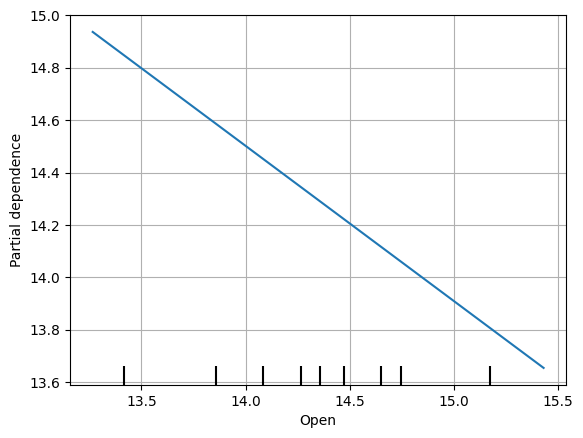

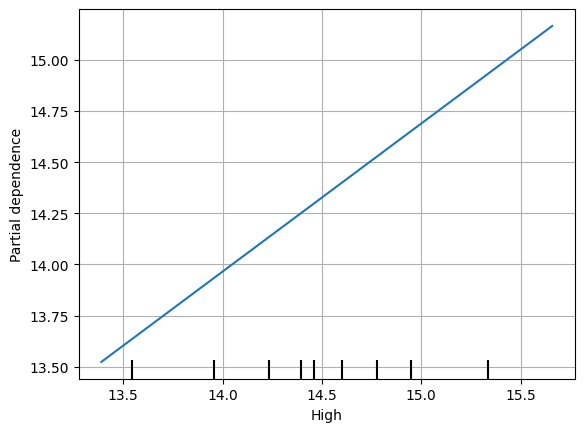

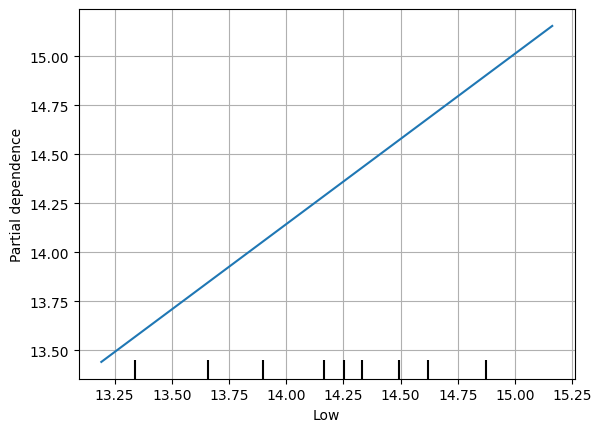

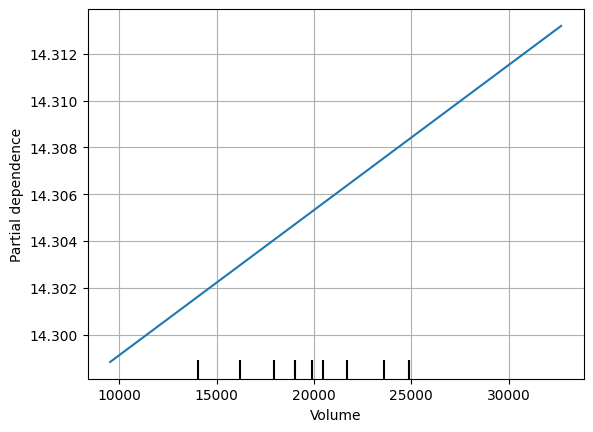

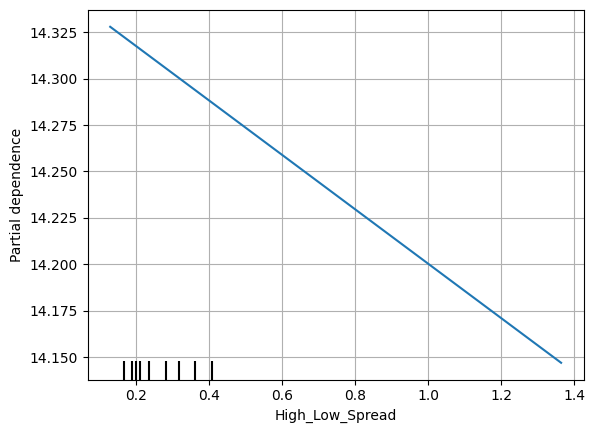

In [81]:
#Create and plot the data for each column in the linear model
for feature_name in columns_of_interest:
  PartialDependenceDisplay.from_estimator(linear_model,val_x,[feature_name])
  plt.grid()
  plt.show()

**Random Forest Partial Dependence Plots**

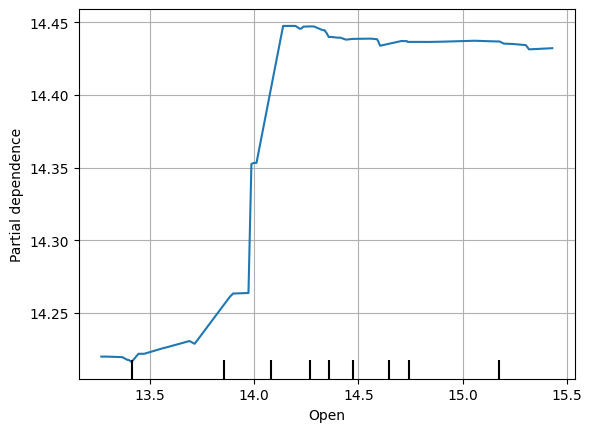

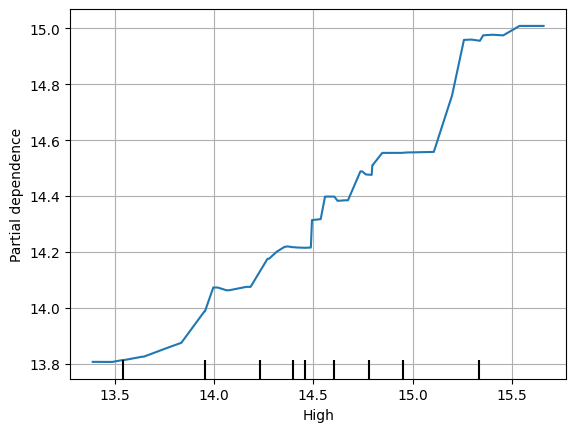

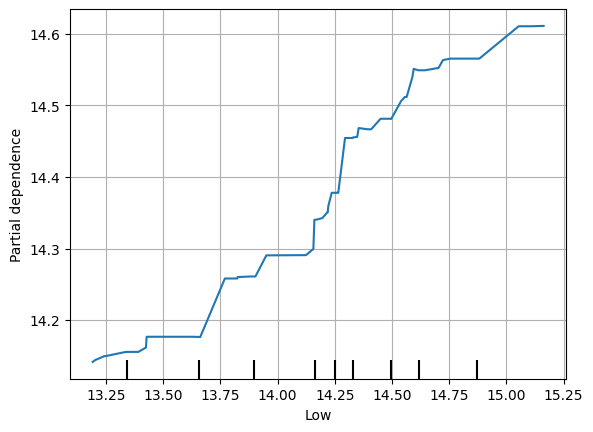

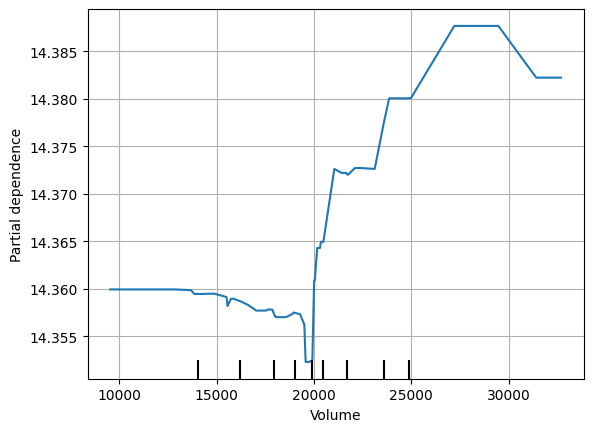

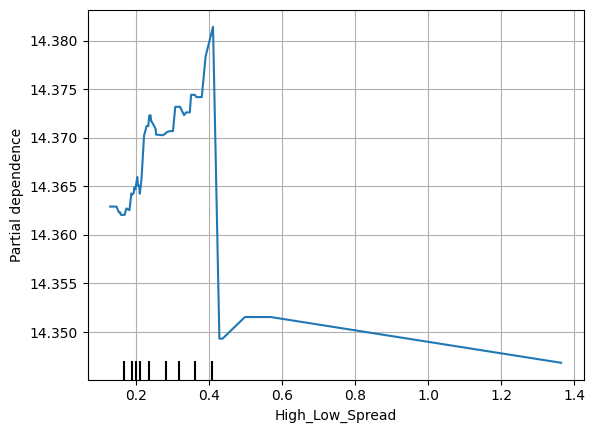

In [82]:
for feature_name in columns_of_interest:
  PartialDependenceDisplay.from_estimator(random_forest_2,val_x,[feature_name])
  plt.grid()
  plt.show()

**2D Partial Dependence Plots**

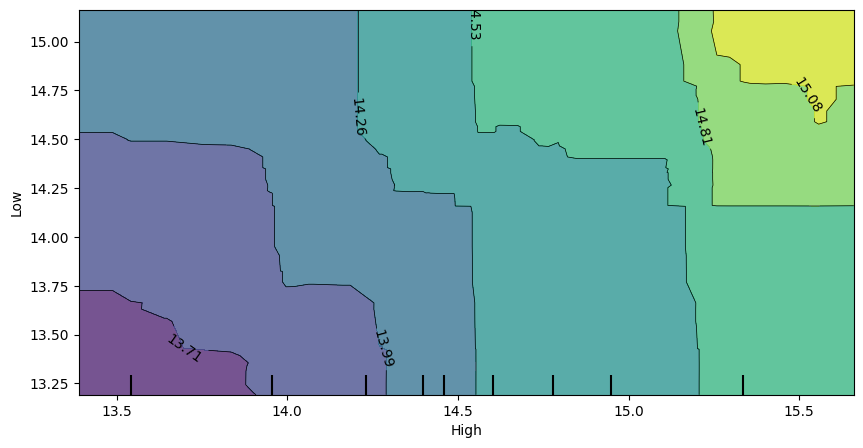

In [ ]:
#Setting up the plot
fig , ax = plt.subplots(figsize=(10,5))
column_names = [('High','Low')]

#Plotting 2D PDP
disp_4 = PartialDependenceDisplay.from_estimator(random_forest_2, val_x,column_names, ax=ax)
plt.show()

**SHAP Values**

In [51]:
#Creating a third random forest model for this example
random_forest_3 = RandomForestRegressor(random_state=1).fit(train_x,train_y)

In [ ]:
#We are going to calculate SHAP Values for the first 10 values
data_to_show = 5
data_for_shap = val_x.iloc[data_to_show]

**Installing SHAP**

In [50]:
#Installing the SHAP library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.0 MB/s eta 0:00:00


**Does the data conform to SHAP Expectations?**

In [86]:
#Before using shap we should note that shap values assume uncorrelated features
#Let's inspect whether our features are uncorrelated
print(df[['Open','Close','High','Low','Volume','High_Low_Spread']].corr())


                     Open     Close      High       Low    Volume  \
Open             1.000000  0.970742  0.978275  0.990718  0.227119   
Close            0.970742  1.000000  0.987514  0.986033  0.260661   
High             0.978275  0.987514  1.000000  0.980333  0.280762   
Low              0.990718  0.986033  0.980333  1.000000  0.218668   
Volume           0.227119  0.260661  0.280762  0.218668  1.000000   
High_Low_Spread  0.207300  0.275514  0.364707  0.173778  0.369314   

                 High_Low_Spread  
Open                    0.207300  
Close                   0.275514  
High                    0.364707  
Low                     0.173778  
Volume                  0.369314  
High_Low_Spread         1.000000  


**Import & Initialise SHAP**

In [91]:
#Import shap library
import shap

#Initialise the shap package
shap.initjs()

**Setup a SHAP Explainer Object & Plot Summary Plot**

In [112]:
#Initialise shap value calculator
tree_explainer = shap.TreeExplainer(random_forest_3)

#Store SHAP values
shap_values = tree_explainer.shap_values(val_x)

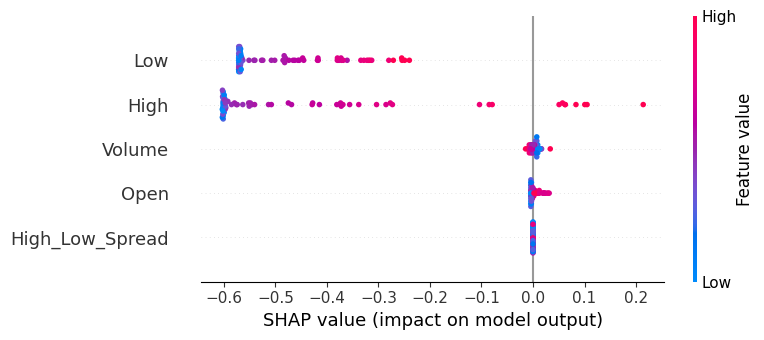

In [119]:
#Plot SHAP values

shap.summary_plot(shap_values,val_x)